## This notebook is designed to explore the Open Food Facts data set at https://www.kaggle.com/datasets/konradb/open-food-facts?select=en.openfoodfacts.org.products_out.csv

### Let's start by importing important libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from scipy.stats import boxcox
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Analyzing what columns to keep 

There are a lot of columns that are not relevant to our target - nutri scores. Let's explore how the data can be processed to make it easier to handle it. 
Since the data set contains over 2 mil products and 201 columns, it is easier to download just the first 10 rows to explore the columns. 

In [2]:
data2 = pd.read_csv("/Users/dakosh/Downloads/en.openfoodfacts.org.products.csv", sep = '\t', nrows = 10)

In [3]:
data2

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,product_name,abbreviated_product_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,nutrinet-sante,jeunes pousses,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,Andrè,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3429145,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1630483911,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,stephane,L.casei,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26772226,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1654250311,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,quentinbrd,Skyr,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,kiliweb,Vitória crackers,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,31,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,isagoofy,Cacao,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,sylvariane,Filetes de pollo empanado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4128579,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1649449251,2022-04-08T20:20:51Z,1649449920,2022-04-08T20:32:00Z,roboto-app,Burger Meat Pollo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,kiliweb,Hamburguesas de ternera 100%,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,6021,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1673478017,2023-01-11T23:00:17Z,1673478020,2023-01-11T23:00:20Z,kiliweb,Blueberry Cobbler Coffee,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data2.shape

(10, 201)

In [5]:
data2["alcohol_100g"]

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: alcohol_100g, dtype: float64

If you try importing the full data set, the following columns are said to have mixed data types. 

In [6]:
column_indices = [0,9,15,21,22,23,24,25,29,30,31,33,42,44,51,65,70,87,148]

In [7]:
mixed_data_columns = data2.columns[column_indices]

In [8]:
print(mixed_data_columns)

Index(['code', 'abbreviated_product_name', 'packaging_text', 'origins',
       'origins_tags', 'origins_en', 'manufacturing_places',
       'manufacturing_places_tags', 'emb_codes', 'emb_codes_tags',
       'first_packaging_code_geo', 'cities_tags', 'allergens', 'traces',
       'additives', 'brand_owner', 'owner', 'energy_100g', 'alcohol_100g'],
      dtype='object')


## Our focus is nutrition score and potential exploration how the nutrition information from food labels can be used to predict nutri-scores. Let's group all columns that are relevant to nutrition information.

In [9]:
columns_with_100g = [col for col in data2.columns if "100g" in col]

In [10]:
columns_with_100g

['energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'unsaturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-linolenic-acid_100g',
 'omega-9-fat_100g',
 'oleic-acid_100g',
 'elaidic-acid_100g',
 'gondoic-acid_100g',
 'mead-acid_100g',
 'erucic-acid_100g',
 'nervonic-acid_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'added-

There are other columns that are important to consider. For example, 'created_datatime' can come handy when choosing between two duplicate entries prioratising the new entry. 

In [11]:
columns_to_leave = ["code", "product_name","categories_en", "allergens", "additives","countries", 'serving_size', 'additives_en',
       'nutriscore_score', 'nutriscore_grade', 'ecoscore_score','ecoscore_grade', 'created_datetime',	'last_modified_t',	'last_modified_datetime' ]

In [12]:
columns_final = columns_to_leave + columns_with_100g

In [13]:
columns_final[-118]

'last_modified_t'

# Exploring data with removed columns



In order to now download all products and avoiding any errors, the following columns needed to have specified data type. 

In [14]:
dtype_spec = {0: 'str', 42: 'str', 51: 'str', 87: float, 148:float}

In [15]:
df = pd.read_csv('/Users/dakosh/Downloads/en.openfoodfacts.org.products.csv', sep = '\t', usecols=columns_final, dtype=dtype_spec)

In [16]:
df.head(5)

,code,created_datetime,last_modified_t,last_modified_datetime,product_name,categories_en,countries,allergens,serving_size,additives,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,en:france,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000000207025004,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,Andrè,NaN,en:de,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00000000000003429145,2021-09-01T08:11:51Z,1656488106,2022-06-29T07:35:06Z,L.casei,NaN,Spain,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00000000000026772226,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,Skyr,"Dairies,Fermented foods,Desserts,Fermented mil...",France,NaN,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000017,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,France,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.shape

(2809009, 131)

Since the focus of this study is nutri-score, lets explore the number of rows that have missing values for "nutri_score" and "nutriscore_grade" and remove those from the data. 

In [18]:
nutriscore_NaN = df['nutriscore_score'].isna() & df['nutriscore_grade'].isna()

In [19]:
removed_rows_df = df[nutriscore_NaN]

In [20]:
#dropping rows with NaN in both nutri columns
df_cleaned = df.dropna(subset=['nutriscore_score', 'nutriscore_grade'], how='all')

In [21]:
removed_rows_df.shape

(1900200, 131)

In [22]:
df_cleaned.shape

(908809, 131)

From 2.8 mil, we now have 0.9 mil products left. The next step is to remove columns that have 100% missing values.


In [23]:

threshold = len(df_cleaned) * 1

columns_with_missing_values = df_cleaned.columns[df_cleaned.isnull().sum() >= threshold]

In [24]:
columns_with_missing_values.tolist()

['additives']

In [25]:

df_cleaned = df_cleaned.drop(columns='additives')


In [26]:
df_cleaned.shape

(908809, 130)

In [27]:
df_cleaned.columns

Index(['code', 'created_datetime', 'last_modified_t', 'last_modified_datetime',
       'product_name', 'categories_en', 'countries', 'allergens',
       'serving_size', 'additives_en',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=130)

In [28]:
df_cleaned.describe()

,last_modified_t,nutriscore_score,ecoscore_score,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,9.088090e+05,908809.000000,488782.000000,1.675170e+05,870808.000000,9.062380e+05,874.000000,906195.000000,905919.000000,35.000000,...,10493.000000,908809.000000,2.00000,5.000000,1.000,31.000000,1481.000000,51.000000,26.000000,5.000000
mean,1.630912e+09,9.228611,46.597296,3.832146e+03,280.619137,1.671517e+03,298.653318,15.752993,5.428762,2.790679,...,610.015641,9.228611,11.00000,39.400000,1.475,23.011806,0.079412,3.496667,0.009877,0.138400
std,3.770650e+07,8.652175,24.810944,1.113055e+06,259.232124,4.785480e+05,437.076274,1050.633476,105.400710,9.931032,...,6458.953467,8.652175,19.79899,20.562101,NaN,75.612913,1.963942,2.810402,0.007565,0.242879
min,1.370571e+09,-15.000000,-30.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.049000,-15.000000,-3.00000,14.000000,1.475,0.000000,0.000000,0.400000,0.001600,0.015000
25%,1.587665e+09,2.000000,28.000000,4.130000e+02,110.000000,4.560250e+02,42.000000,1.100000,0.100000,0.000225,...,107.900000,2.000000,4.00000,30.000000,1.475,0.016350,0.000008,2.250000,0.002000,0.015000
50%,1.644532e+09,10.000000,44.000000,1.005000e+03,266.000000,1.100000e+03,167.000000,8.000000,2.000000,0.040000,...,331.500000,10.000000,11.00000,39.000000,1.475,0.070000,0.000023,3.600000,0.010000,0.040000
75%,1.666371e+09,16.000000,68.000000,1.639000e+03,402.000000,1.680000e+03,377.000000,22.800000,7.500000,0.390000,...,608.600000,16.000000,18.00000,44.000000,1.475,0.190500,0.000102,4.000000,0.018500,0.050000
max,1.679798e+09,40.000000,125.000000,4.555600e+08,105647.000000,4.555600e+08,3630.000000,999999.000000,99999.000000,55.600000,...,656298.600000,40.000000,25.00000,70.000000,1.475,390.000000,54.000000,20.000000,0.024000,0.572000


## Looking for potential outliers: 

Since the dataset entries are user-generated, there's a potential for inaccuracies across all columns that quantify nutritional values per 100 grams. To ensure data integrity, we will eliminate any rows that contain values below 0 or above 100 for key nutritional metrics, as these figures should logically fall within the 0 - 100g range based on a 100g serving size. The crucial nutritional components that will be scrutinized for these corrections are ```fat_100g```, ```carbohydrates_100g```, ```sugars_100g```, ```starch_100g```, ```fiber_100g```, and ```proteins_100g```.

In [29]:
columns_to_check = ['fat_100g', 'carbohydrates_100g', 'sugars_100g', 'starch_100g', 'fiber_100g', 'proteins_100g'] 
mask = df_cleaned[columns_to_check].apply(lambda x: (x < 0) | (x > 100)).any(axis=1)
#Use the inverse of the mask to filter out invalid rows
df_cleaned = df_cleaned[~mask]

In [30]:
df_cleaned.shape

(908599, 130)


We should also verify that the sum of the nutritional components doesn't surpass 100 grams. Given that some entries might be incomplete, leading to a total less than 100 grams (e.g., 70 grams), we'll only eliminate entries where the combined nutritional values exceed 100 grams. This approach ensures we retain rows with partial but useful information, discarding only those with sums that are clearly erroneous.

In [31]:

# Calculate the sum of the columns ending with '100g' for each row
df_cleaned['sum_100g'] = df_cleaned[columns_to_check].sum(axis=1)

# Create a mask for rows that we want to keep
mask = df_cleaned['sum_100g'] <= 100

# applying mask to keep only the desired rows
df_cleaned = df_cleaned.loc[mask]

# removing helper column
df_cleaned.drop(columns=['sum_100g'], inplace=True)

In [32]:
df_cleaned.shape

(694535, 130)

In [33]:
df_cleaned.head(5)

,code,created_datetime,last_modified_t,last_modified_datetime,product_name,categories_en,countries,allergens,serving_size,additives_en,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
3,00000000000026772226,2022-06-03T09:58:31Z,1654270474,2022-06-03T15:34:34Z,Skyr,"Dairies,Fermented foods,Desserts,Fermented mil...",France,NaN,NaN,NaN,...,NaN,-5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,0000000000100,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,"Condiments,Sauces,Mustards,Groceries",France,en:mustard,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,000000000080,2021-02-04T14:07:43Z,1663692490,2022-09-20T16:48:10Z,Pur jus de pomme,"Plant-based foods and beverages,Beverages,Plan...",en:fr,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,0000000000949,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,"Plant-based foods and beverages,Plant-based fo...",France,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,0000000001281,2018-02-05T11:40:01Z,1644567888,2022-02-11T08:24:48Z,Tarte noix de coco,"Sweet pies,Pies,Coconut pies",France,NaN,NaN,NaN,...,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Adressing duplicates

In [34]:
duplicates = df_cleaned['code'].duplicated()

any_duplicates = duplicates.any()

print(f"Are there repeating items in the 'code' column? {any_duplicates}")

Are there repeating items in the 'code' column? True


In [35]:
df_cleaned[duplicates].shape


(20, 130)

Let's sort the data by ```last_modified_datetime``` to and filter out duplicates.

In [36]:

df_sorted = df_cleaned.sort_values(by='last_modified_datetime', ascending=False)
df_refined = df_sorted.drop_duplicates(subset='code', keep='last')

In [37]:

df_refined.shape


(694515, 130)

# Eco_Score Analysis 

In [38]:
df_refined.columns.tolist()

['code',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'categories_en',
 'countries',
 'allergens',
 'serving_size',
 'additives_en',
 'nutriscore_score',
 'nutriscore_grade',
 'ecoscore_score',
 'ecoscore_grade',
 'energy-kj_100g',
 'energy-kcal_100g',
 'energy_100g',
 'energy-from-fat_100g',
 'fat_100g',
 'saturated-fat_100g',
 'butyric-acid_100g',
 'caproic-acid_100g',
 'caprylic-acid_100g',
 'capric-acid_100g',
 'lauric-acid_100g',
 'myristic-acid_100g',
 'palmitic-acid_100g',
 'stearic-acid_100g',
 'arachidic-acid_100g',
 'behenic-acid_100g',
 'lignoceric-acid_100g',
 'cerotic-acid_100g',
 'montanic-acid_100g',
 'melissic-acid_100g',
 'unsaturated-fat_100g',
 'monounsaturated-fat_100g',
 'polyunsaturated-fat_100g',
 'omega-3-fat_100g',
 'alpha-linolenic-acid_100g',
 'eicosapentaenoic-acid_100g',
 'docosahexaenoic-acid_100g',
 'omega-6-fat_100g',
 'linoleic-acid_100g',
 'arachidonic-acid_100g',
 'gamma-linolenic-acid_100g',
 'dihomo-gamma-lin

In [39]:
df_refined['categories_en'].tolist()[100:110]

['Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Potatoes',
 'Dairies,Fermented foods,Fermented milk products,Cheeses,Meat alternatives,Grilling cheeses',
 'Plant-based foods and beverages,Plant-based foods,Fats',
 'Dairies,Fermented foods,Desserts,Fermented milk products,Dairy desserts,Fermented dairy desserts,Yogurts',
 'Dairies,Fermented foods,Fermented milk products,Spreads,Cheeses',
 'Beverages,Waters',
 'Plant-based foods and beverages,Plant-based foods,Breakfasts,Cereals and potatoes,Cereals and their products,Breakfast cereals,Porridge',
 'Dairies,Creams',
 'Plant-based foods and beverages,Plant-based foods,Cereals and potatoes,Breads,Toasts,Toasted bread rolls',
 'Dairies,Fermented foods,Fermented milk products,Cheeses,Meat alternatives,Cypriot cheeses,Grilling cheeses,Halloumi']

## The original ```categories_en``` column has too many words within one entry. To simplify the process of data exploration and visualisation, let's create anotther column that has fewer unique values that generally cover the product categories. 

In [63]:
df_refined['categories_en'] = df_refined['categories_en'].astype(str)
category_mapping = {
    'Meat and Poultry':['meat','chicken'],
    'Seafood':['seafood'],
    'dairy and eggs': ['dairy', 'eggs', 'yogurt', 'milk','cream'],
    'fruits and vegetables' :[ 'fruits', 'vegetables'],
    'Grains and Pasta' : ['grains', 'pasta'],
    'Snacks and Sweet': ['snacks', "sweet",'dessert', 'chocolate'],
    'beverages': ['beverages'],
    'Condiments and sauces' :['sauce','seasoning','spread', 'supplements'],
    'fats and oils': ['fats', 'oils'] ,
    'prepared or frozen meals': ['frozen', 'prepared','canned','fries', 'sandwich', 'pizza', 'meal'],
    'nuts' : ['nut'] 
}
def assign_simple_category(row):
    for simple_category, keywords in category_mapping.items():
        if any(keyword in row.lower() for keyword in keywords):
            return simple_category
    return 'other'  # default category if no match is found


df_refined['simple_category'] = df_refined['categories_en'].apply(assign_simple_category)


## Let's plot a histogram of all "simple" categories 

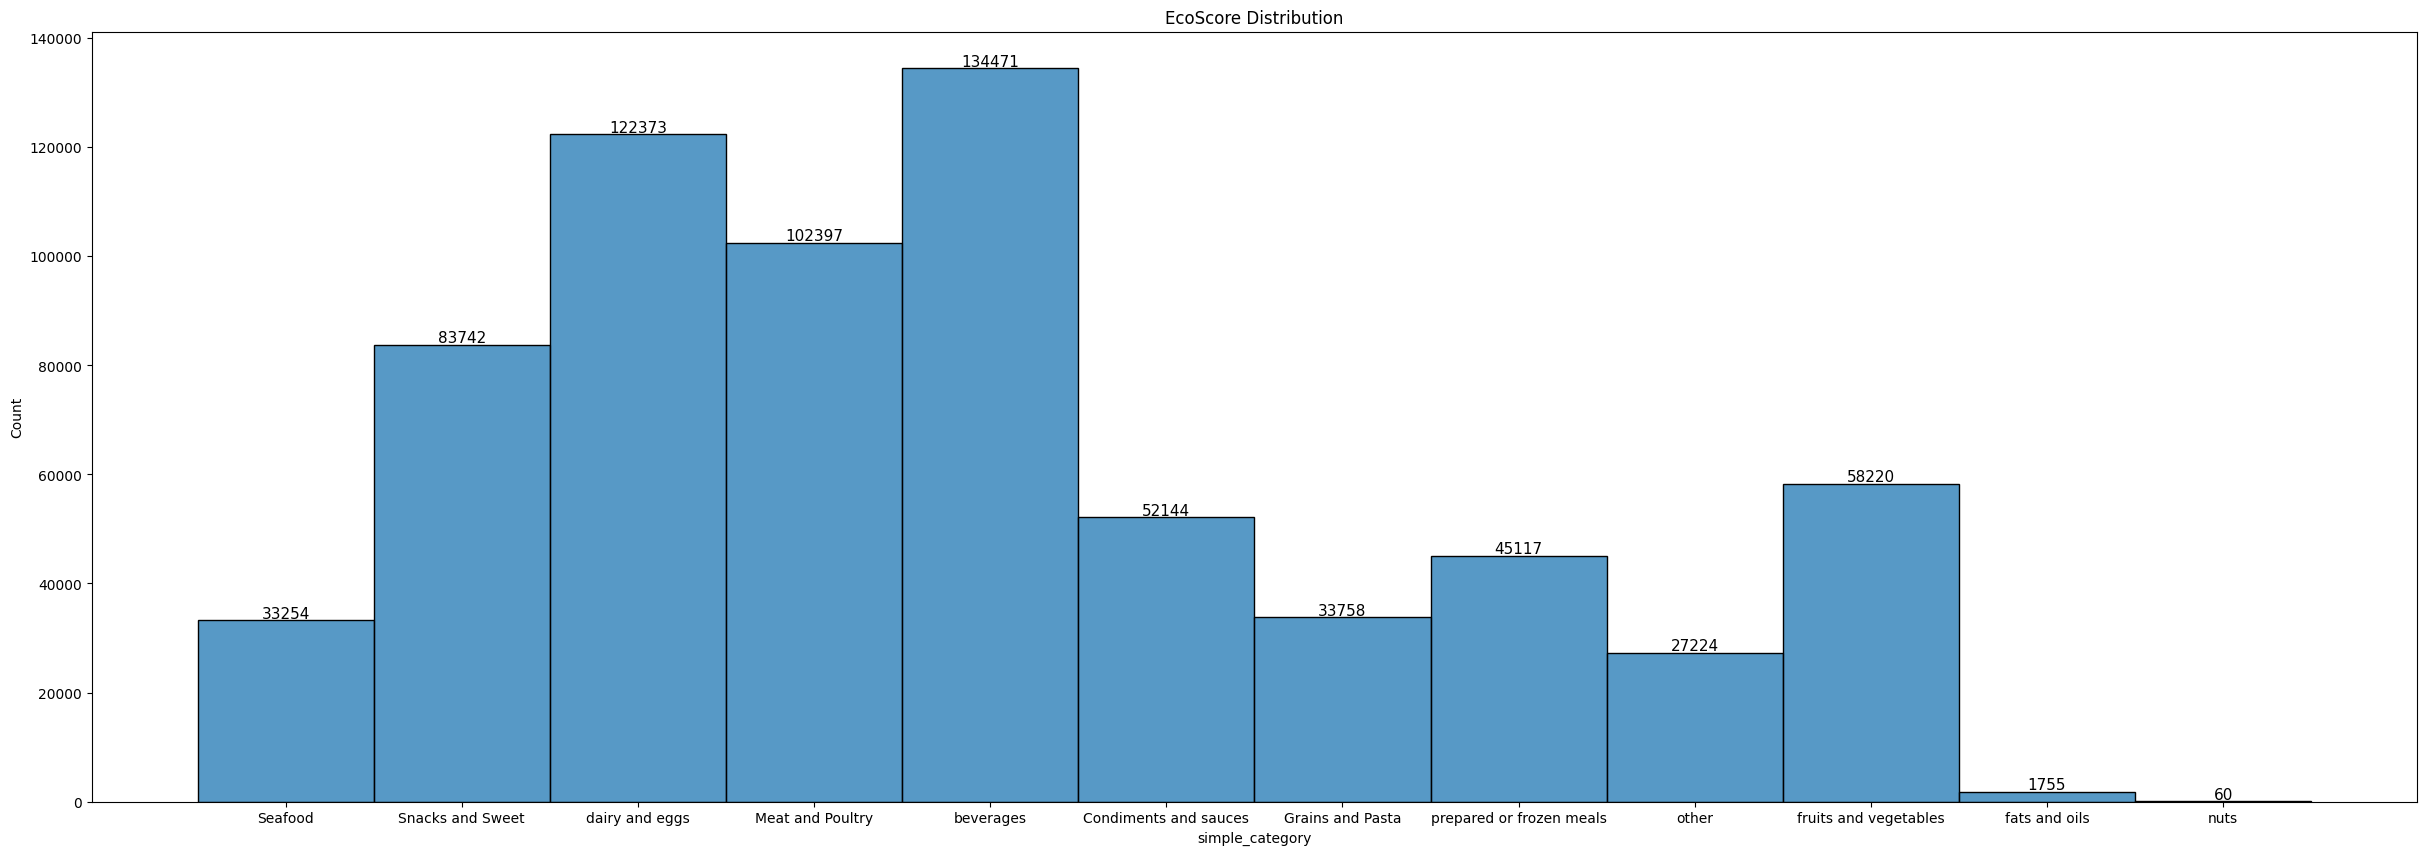

In [66]:
plt.figure(figsize=(30,10))
ax = sns.histplot(df_refined['simple_category'], kde= False)
ax.set_title('EcoScore Distribution')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')



## Now let's do the same for EcoScore just to see overall distribution. 

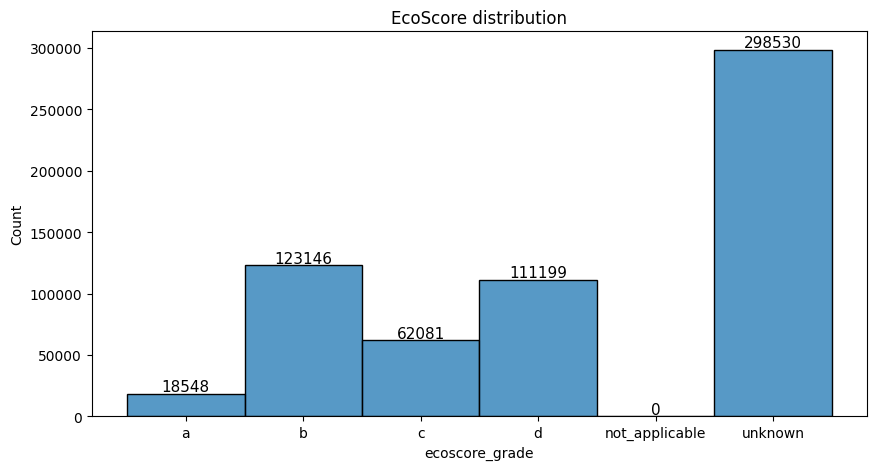

In [65]:
categories = ['a', 'b', 'c', 'd', 'not_applicable', 'unknown']  
df_refined['ecoscore_grade'] = pd.Categorical(df_refined['ecoscore_grade'], categories=categories, ordered=True)
plt.figure(figsize=(10,5))
ax = sns.histplot(df_refined['ecoscore_grade'], bins=len(categories), kde=False)  
ax.set_title('EcoScore Distribution')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.title('EcoScore distribution')

plt.show()

On the histogram it seems there are no products with 'not_applicable' tag for EcoScore. Indeed, if we calculate the number of items satisfying this condition, the value is zero, therefore let's exclude this category for better visualisation. 

In [43]:
(df_refined['ecoscore_grade'] == 'not_applicable').sum()

0

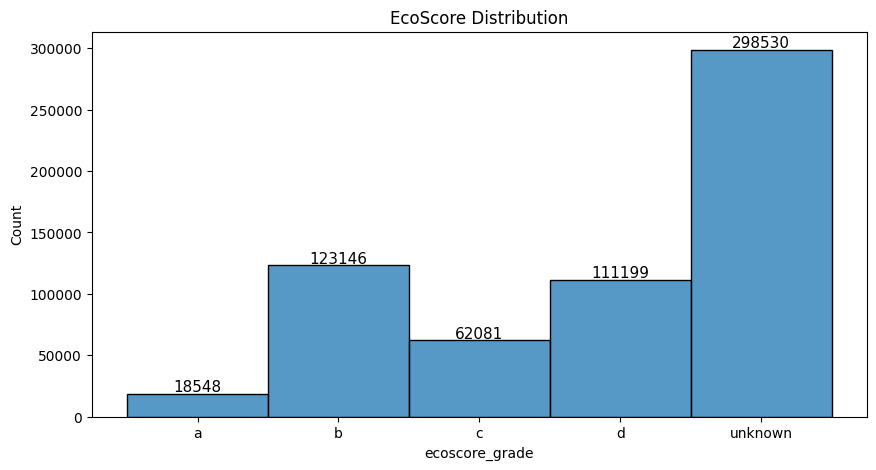

In [67]:
categories = ['a', 'b', 'c', 'd', 'unknown']  
df_refined['ecoscore_grade'] = pd.Categorical(df_refined['ecoscore_grade'], categories=categories, ordered=True)
plt.figure(figsize=(10,5))
ax = sns.histplot(df_refined['ecoscore_grade'], bins=len(categories), kde=False)  
ax.set_title('EcoScore Distribution')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

Same distribution in the form of a pie chart: 

<Figure size 1000x700 with 0 Axes>

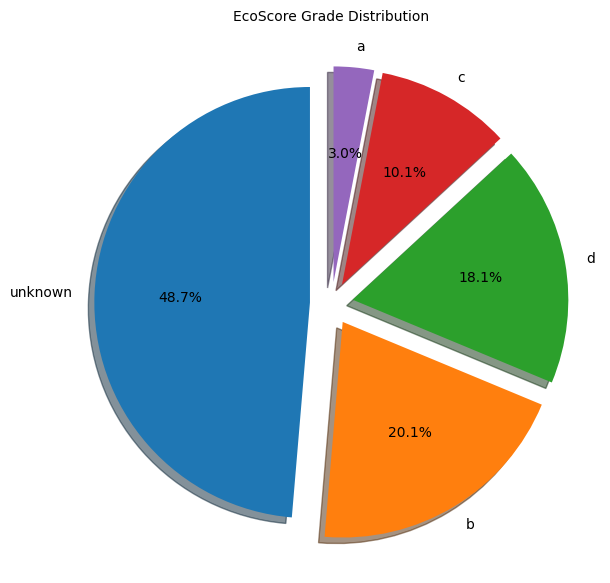

In [45]:
ecoscore_counts = df_refined['ecoscore_grade'].value_counts()
plt.figure(figsize=(10, 7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
explode = (0.1, 0.1, 0.1, 0.1, 0.1) 
plt.figure(figsize=(10, 7))
plt.pie(ecoscore_counts, labels=ecoscore_counts.index, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title('EcoScore Grade Distribution', pad=10, fontsize=10)
plt.show()

## We may then observe how EcoScore varies by simple categories. 

/var/folders/b_/mgwfywyx4dq0q3m_1rfy4rkh0000gn/T/ipykernel_1713/3014393349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['ecoscore_grade'] = pd.Categorical(df_refined['ecoscore_grade'], categories=categories, ordered=True)


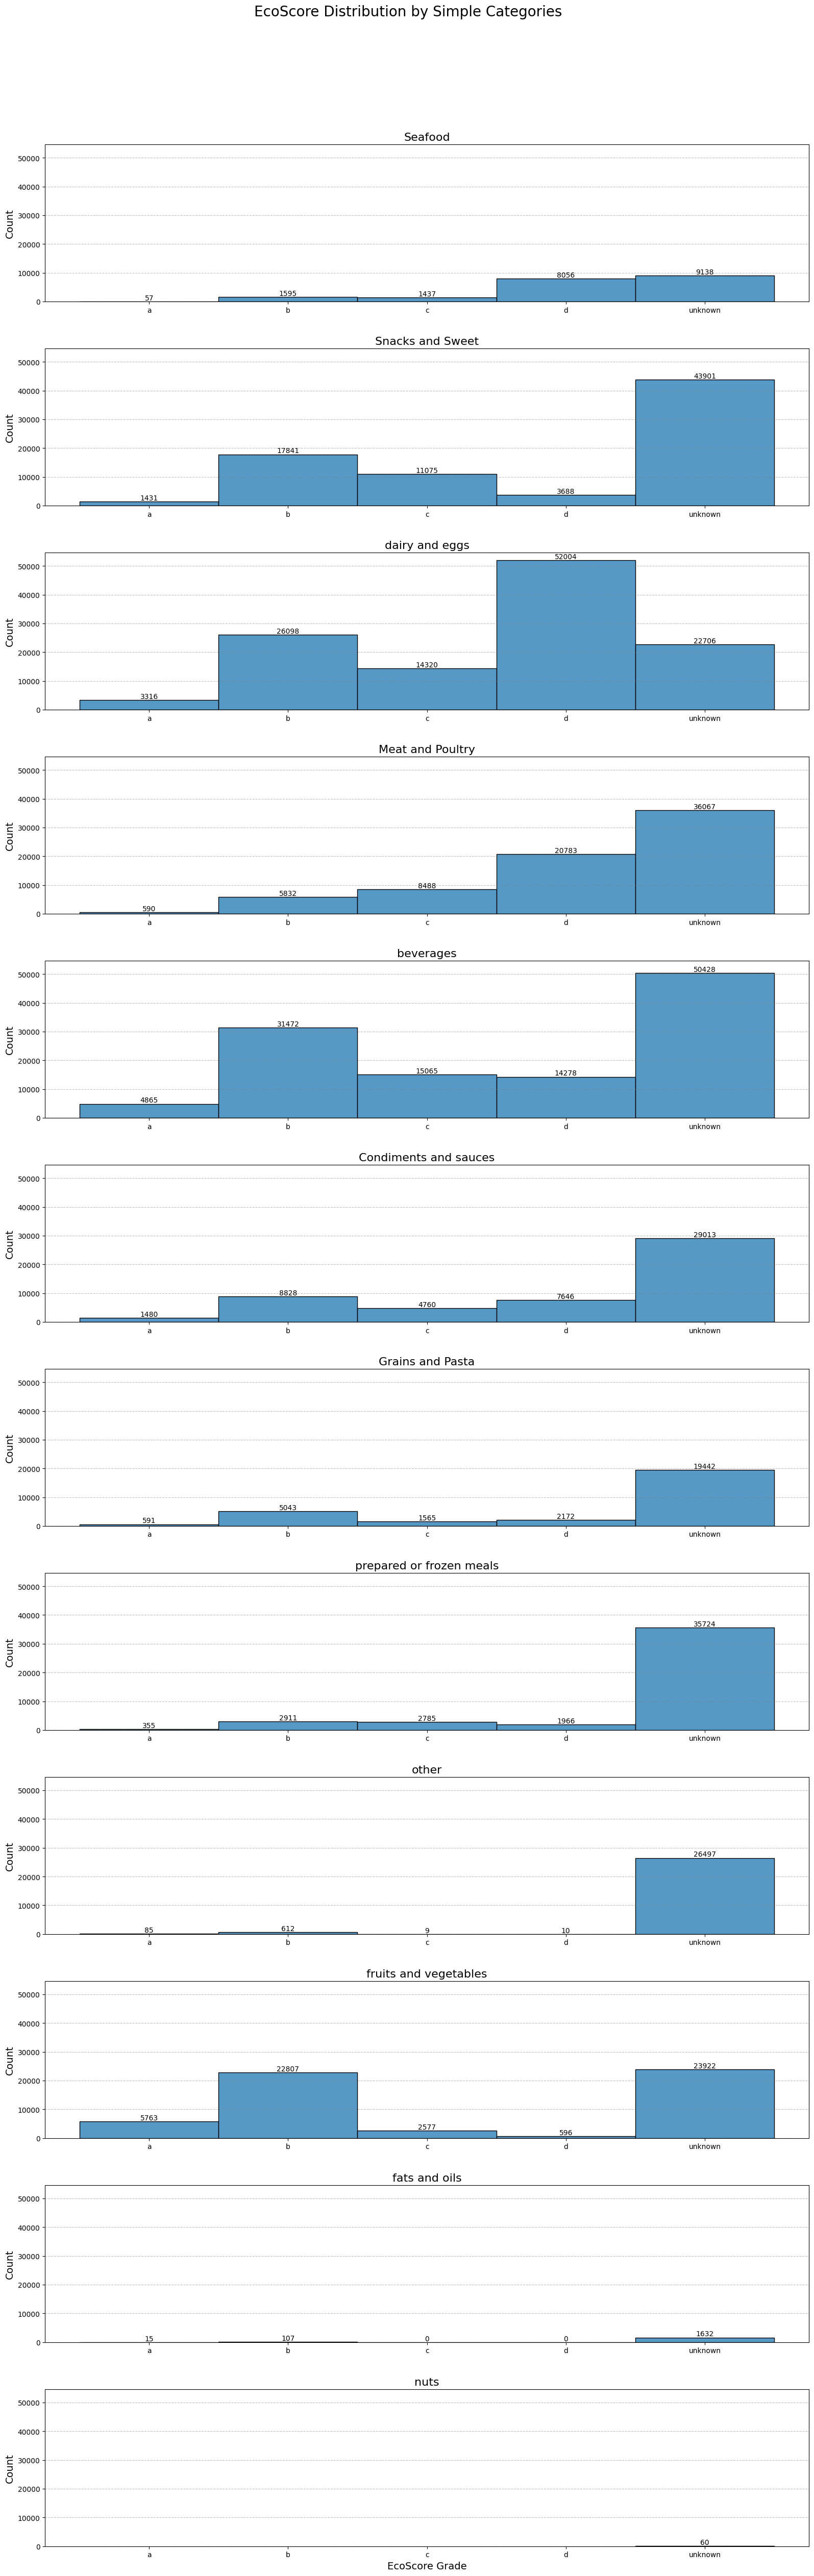

In [46]:


categories = ['a', 'b', 'c', 'd', 'unknown']
df_refined['ecoscore_grade'] = pd.Categorical(df_refined['ecoscore_grade'], categories=categories, ordered=True)

g = sns.FacetGrid(df_refined, row='simple_category', height=4, aspect=4, despine=False)
g.map(sns.histplot, 'ecoscore_grade', bins=len(categories), kde=False)

g.set_titles(row_template='{row_name}', size=16)
g.set_xlabels('EcoScore Grade', size=14)
g.set_ylabels('Count', size=14)

for ax in g.axes.flat:
    ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.5)
    ax.xaxis.set_tick_params(labelbottom=True)  # Make x-axis labels visible on all subplots
    for p in ax.patches:  # Iterate over each bar to place the count text
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.subplots_adjust(hspace=0.3)
g.fig.suptitle('EcoScore Distribution by Simple Categories', size=20, y=1.05)
plt.show()


Pie chart distribution of EcoScores within ```simple categories```

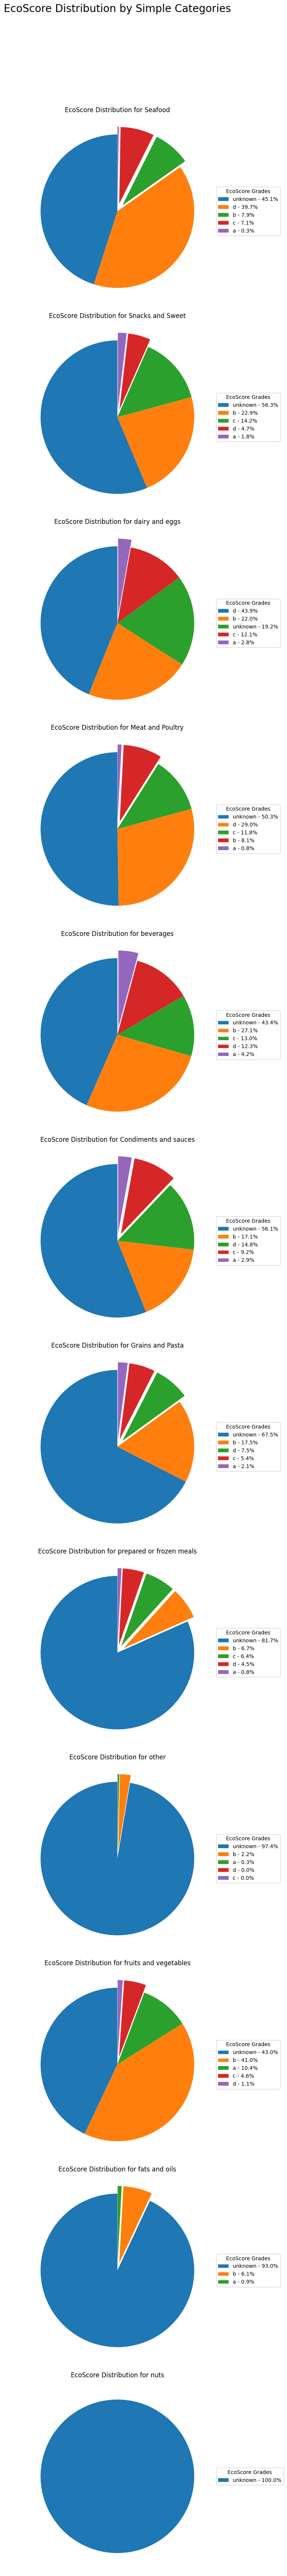

In [47]:



simple_categories = df_refined['simple_category'].unique()


n_categories = len(simple_categories)
fig, axes = plt.subplots(n_categories, 1, figsize=(10, 6 * n_categories), constrained_layout=True)

# Iterate over each simple category to create a pie chart
for i, category in enumerate(simple_categories):
   
    subset = df_refined[df_refined['simple_category'] == category]
    
    # Count the occurrence of each ecoscore grade, excluding zero counts
    counts = subset['ecoscore_grade'].value_counts()
    counts = counts[counts > 0]  # Exclude zero counts

    #Expode configuration
    explode_values = [0.1 if count < (0.1 * counts.sum()) else 0 for count in counts]

  
    wedges, texts, autotexts = axes[i].pie(counts, startangle=90, autopct='', explode=explode_values)

    # Legend 
    axes[i].legend(wedges, [f'{label} - {count/counts.sum()*100:.1f}%' for label, count in counts.items()],
                   title="EcoScore Grades",
                   loc="center left",
                   bbox_to_anchor=(1, 0.5))

    axes[i].set_title(f'EcoScore Distribution for {category}')

#Title
fig.suptitle('EcoScore Distribution by Simple Categories', size=20)

# Adjusting layout to prevent overlapping
fig.tight_layout(rect=[0, 0.03, 1, 0.95])


plt.show()


### ASK SASHA: Let's delve explore what products there are in "Nuts" category and understand why are EcoScores are missing for them

In [48]:
nut_items_mask = (df_refined['simple_category'] == 'fruits and vegetables')
nut_items = df_refined[nut_items_mask] 
nut_items.shape

(58220, 131)

## Exloring How EcoScores vary with NutriScore: Is there any correlation? 

In [49]:
missing_percentage = df_refined['ecoscore_score'].isnull().mean() * 100

print(f"Percentage of missing values in 'ecoscore_score' column: {missing_percentage}%")

Percentage of missing values in 'ecoscore_score' column: 45.250282571290754%


In [50]:
missing_percentage = df_refined['ecoscore_grade'].isnull().mean() * 100
print(f"Percentage of missing values in 'ecoscore_grade' column: {missing_percentage}%")

Percentage of missing values in 'ecoscore_grade' column: 11.664398897072058%


In [51]:
missing_percentage = df_refined['nutriscore_score'].isnull().mean() * 100
print(f"Percentage of missing values in 'nutriscore_score' column: {missing_percentage}%")

Percentage of missing values in 'nutriscore_score' column: 0.0%


In [52]:
missing_percentage = df_refined['nutriscore_grade'].isnull().mean() * 100
print(f"Percentage of missing values in 'nutriscore_grade' column: {missing_percentage}%")

Percentage of missing values in 'nutriscore_grade' column: 0.0%


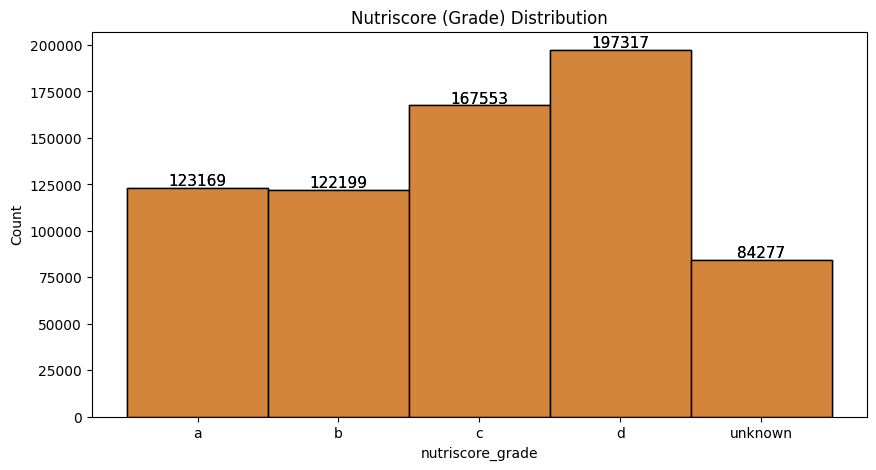

In [68]:
categories = ['a', 'b', 'c', 'd', 'unknown']  
df_refined['nutriscore_grade'] = pd.Categorical(df_refined['nutriscore_grade'], categories = categories, ordered=True)
df_refined['nutriscore_grade'].fillna('unknown', inplace=True)
plt.figure(figsize=(10,5))
sns.histplot(df_refined['nutriscore_grade'], bins=50, kde= False)
ax = sns.histplot(df_refined['nutriscore_grade'], bins=len(categories), kde=False)  # Ensure bins match the number of categories
ax.set_title('Nutriscore (Grade) Distribution')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), textcoords='offset points')



plt.show()

<Figure size 1000x700 with 0 Axes>

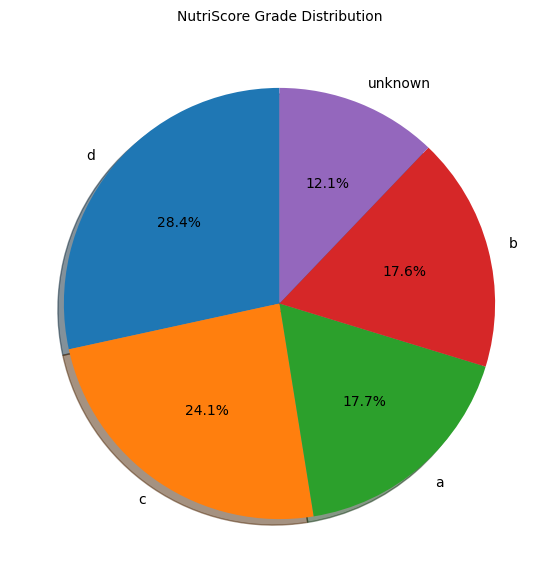

In [54]:
nutriscore_counts = df_refined['nutriscore_grade'].value_counts()
plt.figure(figsize=(10, 7))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

plt.figure(figsize=(10, 7))
plt.pie(nutriscore_counts, labels=nutriscore_counts.index, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('NutriScore Grade Distribution', pad=10, fontsize=10)
plt.show()

## 100% of ```nutriscore_score``` and 45% of ```ecoscore_score``` are missing. Therefore let's focus solely on the relationshp between ```ecoscore_grade``` and ```nutriscore_grade```. However, first, let's exclude all entries where these values are missing and then explore the correlation between these two. 

In [55]:
df_cor = df_refined.dropna(subset=['nutriscore_grade', 'ecoscore_grade'], how='any')

# Now, let's verify the removal 
missing_nutriscore_percentage = df_cor['nutriscore_grade'].isnull().mean() * 100
missing_ecoscore_percentage = df_cor['ecoscore_grade'].isnull().mean() * 100

print(f"Percentage of missing values in 'nutriscore_grade' column after cleaning: {missing_nutriscore_percentage}%")
print(f"Percentage of missing values in 'ecoscore_grade' column after cleaning: {missing_ecoscore_percentage}%")


Percentage of missing values in 'nutriscore_grade' column after cleaning: 0.0%
Percentage of missing values in 'ecoscore_grade' column after cleaning: 0.0%


## Since our grades are categorical, we need to first assign a numerical value for each letter. We will then be able to perform statistical tests to assess any correlation between the two scores.

In [62]:

import scipy.stats as stats
grade_mapping = {'a': 4, 'b': 3, 'c': 2, 'd': 1, 'unknown': 0}
df_cor['nutriscore_score_num'] = df_cor['nutriscore_grade'].map(grade_mapping)
df_cor['ecoscore_score_num'] = df_cor['ecoscore_grade'].map(grade_mapping)

# Spearman's Rank Correlation
spearman_corr, spearman_p = stats.spearmanr(df_cor['nutriscore_score_num'], df_cor['ecoscore_score_num'])
print(f"Spearman's Rank Correlation: {spearman_corr}, P-value: {spearman_p}")

#Kendall's Tau
kendall_tau, kendall_p = stats.kendalltau(df_cor['nutriscore_score_num'], df_cor['ecoscore_score_num'])
print(f"Kendall's Tau: {kendall_tau}, P-value: {kendall_p}")

Spearman's Rank Correlation: 0.053116644918922665, P-value: 0.0
Kendall's Tau: 0.044556148686728574, P-value: 0.0


#### The EcoScore grades and NutriScore grades represent ordinal data. The grades are not normally distributed however both Spearman's Rank Correlation and Kendall's Tau are suitable for our case. The obtained correlation number is around 0.05 which indicates a minimal positive correlation and a P-value < 0.05 indicates that these results are statistically significant. Nevertheless, the practical applications of the obtained correlation are not meaningful considering the correlation value. This situation is common for data with a large sample size. Having said that, it is a question of deeper research to determine what factors influence either EcoScore or NutriScore. For customers, this might indicate that choosing a product based on high NutriScore doesn't guarantee a favourable EcoScore.